In [166]:
import pandas as pd
np.random.seed(1234)
data = pd.read_csv('data.csv')
data.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,label
0,0.018333,0.153177,0.109633,0.566102,0.450673,0.342021,0.009024,0.000000,0.160000,0.206667,...,0.618985,0.596247,0.578587,0.578366,0.593157,0.575276,0.561810,0.571523,0.528477,1
1,0.021658,0.157318,0.094548,0.487893,0.270911,0.157754,0.010290,0.000000,0.106667,0.053333,...,0.284768,0.495364,0.453642,0.307726,0.403311,0.000000,0.020971,0.437748,0.201104,1
2,0.018390,0.159475,0.101243,0.513242,0.309806,0.245959,0.000000,0.011207,0.100000,0.113333,...,0.539956,0.561589,0.563797,0.562472,0.527373,0.240397,0.090728,0.482119,0.551214,1
3,0.019391,0.163563,0.092147,0.498588,0.390871,0.262954,0.006681,0.000000,0.093333,0.080000,...,0.612804,0.612583,0.528477,0.259603,0.599338,0.470640,0.532230,0.479912,0.497572,1
4,0.021645,0.163691,0.109068,0.533898,0.505861,0.356144,0.012794,0.010953,0.120000,0.113333,...,0.630905,0.658940,0.000000,0.663135,0.638631,0.612141,0.331567,0.635099,0.682561,1


In [2]:
data.describe()#数据统计特征描述

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,label
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.021152,0.152965,0.102673,0.498355,0.326190,0.224076,0.014610,0.019096,0.102667,0.089524,...,0.431113,0.478556,0.419010,0.382441,0.439729,0.338013,0.225336,0.446648,0.368338,0.571429
std,0.002590,0.020194,0.013575,0.067957,0.165169,0.117795,0.010296,0.019531,0.030215,0.037757,...,0.234521,0.204732,0.242001,0.265576,0.245194,0.264080,0.235808,0.242450,0.243467,0.502096
min,0.015533,0.115833,0.077825,0.334216,0.022161,0.013577,0.000000,0.000000,0.026667,0.013333,...,0.000000,0.021192,0.000000,0.000000,0.000000,0.000000,0.000000,0.018102,0.020751,0.000000
25%,0.019400,0.139839,0.092924,0.459692,0.169544,0.127929,0.006957,0.000000,0.090000,0.063333,...,0.288079,0.342605,0.233223,0.129139,0.244150,0.062693,0.023179,0.180464,0.129912,0.000000
50%,0.020960,0.153177,0.101243,0.498588,0.363555,0.262954,0.012794,0.013118,0.106667,0.086667,...,0.513687,0.590949,0.528477,0.415894,0.540177,0.287196,0.090728,0.553642,0.384327,1.000000
75%,0.022391,0.163627,0.111285,0.537492,0.461589,0.327945,0.021083,0.028273,0.120000,0.110000,...,0.628477,0.634216,0.635541,0.626932,0.638631,0.593709,0.443709,0.648565,0.596578,1.000000
max,0.027774,0.217985,0.131469,0.617797,0.548259,0.388355,0.043971,0.065970,0.160000,0.206667,...,0.718322,0.723400,0.708389,0.776821,0.724062,0.785651,0.718543,0.708609,0.690287,1.000000


In [3]:
#label为目标变量，1表示为运动员，
print(data.label.value_counts())
print('不同类别在数据中的占比\n',data.label.value_counts()/len(data.label))

1    20
0    15
Name: label, dtype: int64
不同类别在数据中的占比
 1    0.571429
0    0.428571
Name: label, dtype: float64


In [59]:
import warnings
warnings.filterwarnings('ignore')
#目标变量划分
X = data.iloc[:,:-1]
Y = data.label

#数据标准化
from sklearn.preprocessing import StandardScaler
mod = StandardScaler().fit(X)#数据集训练

X_s = pd.DataFrame(mod.transform(X),columns = X.columns)#转换


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
def model_metric(X,Y):
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

    ## 建模并评估
    keys = []
    scores = []
    f1 = []
    recall = []
    precision = []
    roc_auc = []
#     cro_train = []
    cro_test = []
    cv = StratifiedKFold(4)
    models = {'逻辑回归': LogisticRegression(solver='liblinear'),
              '线性支持向量机': LinearSVC(),
              '决策树': DecisionTreeClassifier(),
              '随机森林':RandomForestClassifier(n_estimators=15),
              'k近邻':KNeighborsClassifier(n_neighbors=20)}

    for k,v in models.items():
        mod = v
        mod.fit(x_train, y_train.values.ravel())
        pred = mod.predict(x_test)
        print(str(k) + '建模效果：' + '\n')
        print(classification_report(y_test, pred))
        acc = accuracy_score(y_test, pred)
        print('测试集上分类正确率：'+ str(acc))
        print('模型预测效果：'+str(mod.score(x_test,y_test)))
        print('\n' + '\n')
        
        cro_score = cross_validate(mod,X,Y,cv=cv)
        keys.append(k)
        scores.append(acc)
        f1.append(f1_score(y_test,pred))
        recall.append(recall_score(y_test,pred))
        precision.append(precision_score(y_test,pred))
        roc_auc.append(roc_auc_score(y_test,pred))
#         cro_train.append((cro_score['train_score']).mean())
        cro_test.append((cro_score['test_score']).mean())
        
        table = pd.DataFrame({'model':keys, 'accuracy score':scores,
                             'f1 score':f1,'recall':recall,'precision':precision,
                             'roc_auc':roc_auc,'cro_test':cro_test})

    return table

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
np.random.seed(10)
#采用随机森林可以计算特征与目标之间的相关性和重要性排序

def importance(X,Y):
    clf1 = RandomForestClassifier(n_estimators=10)
    clf1.fit(X,Y)
    pred = clf1.predict(X)
    plt.figure()
    cm = confusion_matrix(Y, pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    plt.show()
    print(classification_report(Y, pred))
    acc = accuracy_score(Y, pred)
    print('在全部数据集上分类正确率：'+ str(acc))
    print('模型预测效果：'+str(clf1.score(X,Y)))
    print('\n' + '\n')
    feature_importance = clf1.feature_importances_

    print('选择出来的特征重要性\n',pd.DataFrame(feature_importance,index=X.columns,columns=['importance']).sort_values(['importance'],ascending=False))
    features_list = X.columns.values
    sorted_idx = np.argsort(feature_importance)#返回的是数组值从小到大的索引值

    pos = np.arange(sorted_idx.shape[0])+.5#设置间隔

    plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align='center')

    plt.yticks(pos,features_list[sorted_idx])

    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

# 不对数据进行特征选择时

In [162]:

model_metric(X_s,Y)

逻辑回归建模效果：

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

测试集上分类正确率：0.8571428571428571
模型预测效果：0.8571428571428571



线性支持向量机建模效果：

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

测试集上分类正确率：0.8571428571428571
模型预测效果：0.8571428571428571



决策树建模效果：

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3

    accuracy                   

,model,accuracy score,f1 score,recall,precision,roc_auc,cro_test
0,逻辑回归,0.857143,0.857143,1.000000,0.75,0.875000,0.861111
1,线性支持向量机,0.857143,0.857143,1.000000,0.75,0.875000,0.805556
2,决策树,0.571429,0.571429,0.666667,0.50,0.583333,0.711806
3,随机森林,0.714286,0.750000,1.000000,0.60,0.750000,0.829861
4,k近邻,0.714286,0.750000,1.000000,0.60,0.750000,0.777778


<Figure size 432x288 with 0 Axes>

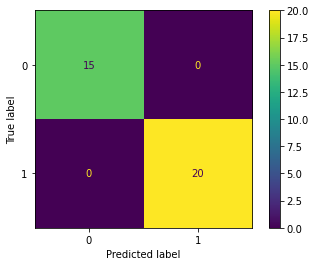

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        20

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

在全部数据集上分类正确率：1.0
模型预测效果：1.0



选择出来的特征重要性
            importance
feature11    0.128070
feature2     0.109022
feature23    0.085216
feature19    0.072228
feature6     0.067692
feature15    0.063357
feature16    0.061431
feature17    0.060969
feature1     0.060061
feature14    0.050390
feature21    0.039967
feature7     0.035606
feature13    0.033740
feature8     0.030883
feature24    0.021021
feature12    0.020895
feature9     0.017552
feature3     0.016997
feature22    0.010691
feature20    0.008454
feature18    0.005757
feature10    0.000000
feature5     0.000000
feature4     0.000000


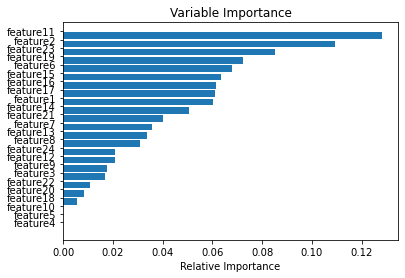

In [156]:
importance(X_s,Y)

# 进行特征选择后，在进行评估预测

In [157]:
#进行特征选择,采用递归特征消除法
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
def KFold(num):
    min_features_to_select = 1 #最小选择的特征
    #clf = DecisionTreeClassifier()
    clf = LogisticRegression()
    cv = StratifiedKFold(num)#采用五折交叉验证
    #选择10个相关特征
    rfecv = RFECV(estimator = clf,step = 1,cv=cv,scoring='accuracy',
               min_features_to_select = min_features_to_select,n_jobs=2)
    rfecv.fit_transform(X_s,Y)
    print(f'{num}折交叉验证下最佳特征个数：{rfecv.n_features_}')
    print(f'{num}折交叉验证下模型评估得分：{rfecv.score(X_s,Y)}')
    #只采用相关性较高的特征
    columns = X_s.columns[rfecv.support_]
    rfe_X = X_s[columns]
    
    #绘制选择特征之间的相关性
    ranking = rfecv.ranking_.reshape(1,X_s.shape[-1])
    sns.heatmap(rfe_X.corr(),cmap=plt.cm.viridis)
    print('')
    plt.figure()
    plt.matshow(ranking, cmap=plt.cm.viridis)#所有特征的重要性，其中颜色越深代表越重要
    plt.show()
    print('-------------------------------------')
    return rfe_X

3折交叉验证下最佳特征个数：12
3折交叉验证下模型评估得分：1.0



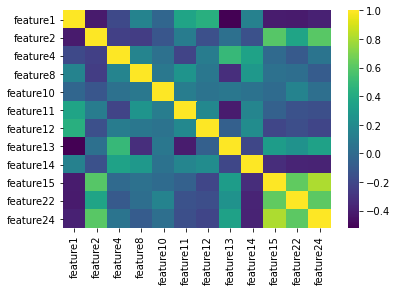

<Figure size 432x288 with 0 Axes>

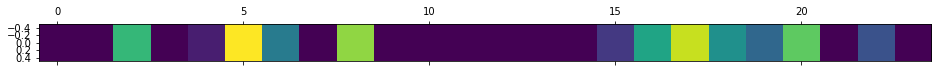

-------------------------------------
4折交叉验证下最佳特征个数：10
4折交叉验证下模型评估得分：1.0



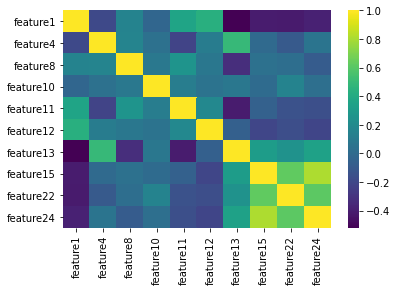

<Figure size 432x288 with 0 Axes>

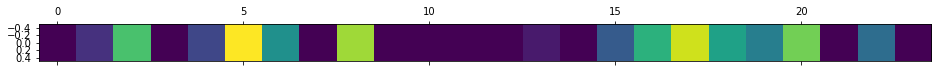

-------------------------------------
5折交叉验证下最佳特征个数：9
5折交叉验证下模型评估得分：0.9714285714285714



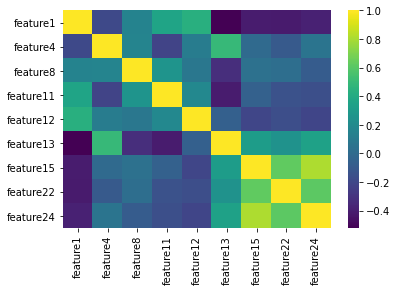

<Figure size 432x288 with 0 Axes>

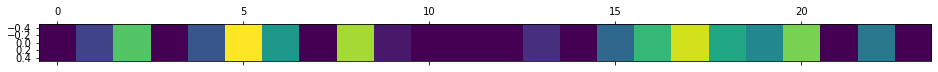

-------------------------------------


In [77]:
for num in range(3,6):
    KFold(num)

3折交叉验证下最佳特征个数：12
3折交叉验证下模型评估得分：1.0



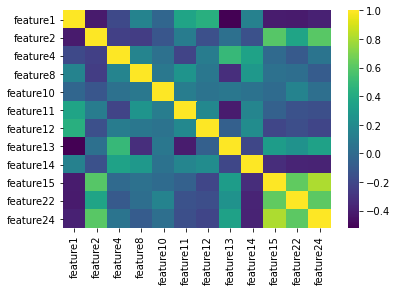

<Figure size 432x288 with 0 Axes>

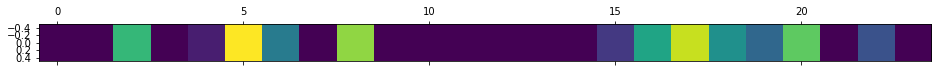

-------------------------------------


In [159]:
#根据上述结果，采用4折交叉验证
rfe_X = KFold(3)

In [160]:
#拆分数据集

model_metric(rfe_X,Y)

逻辑回归建模效果：

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

测试集上分类正确率：1.0
模型预测效果：1.0



线性支持向量机建模效果：

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

测试集上分类正确率：1.0
模型预测效果：1.0



决策树建模效果：

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.80      0.75    

,model,accuracy score,f1 score,recall,precision,roc_auc,cro_test
0,逻辑回归,1.000000,1.000000,1.0,1.00,1.000,0.888889
1,线性支持向量机,1.000000,1.000000,1.0,1.00,1.000,0.833333
2,决策树,0.714286,0.750000,1.0,0.60,0.750,0.659722
3,随机森林,0.857143,0.857143,1.0,0.75,0.875,0.913194
4,k近邻,0.571429,0.666667,1.0,0.50,0.625,0.750000


<Figure size 432x288 with 0 Axes>

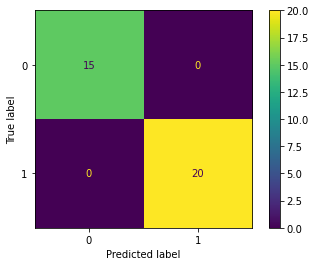

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        20

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

在全部数据集上分类正确率：1.0
模型预测效果：1.0



选择出来的特征重要性
            importance
feature13    0.183398
feature24    0.171094
feature22    0.146266
feature14    0.114303
feature15    0.104374
feature1     0.060977
feature2     0.049190
feature4     0.041347
feature12    0.041173
feature10    0.033714
feature11    0.027296
feature8     0.026868


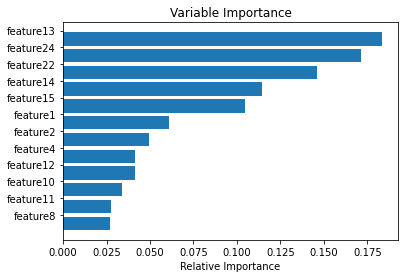

In [168]:
importance(rfe_X,Y)

In [ ]:
importance(rfe_X,Y)

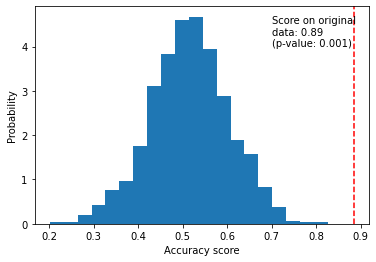

In [126]:
from sklearn.model_selection import permutation_test_score
cv = StratifiedKFold(4)
clf1 = RandomForestClassifier(n_estimators=10)

score, perm_scores, pvalue = permutation_test_score(
    clf1, rfe_X, Y, scoring="accuracy", cv=cv, n_permutations=1000)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 4, score_label, fontsize=10)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

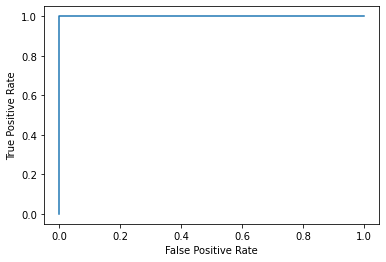

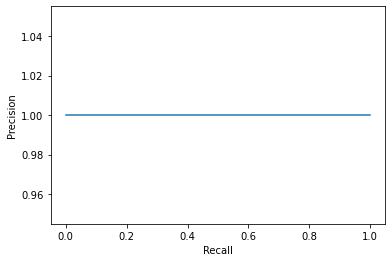

In [140]:
#逻辑回归提供了decision function
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
clf = make_pipeline( LogisticRegression(random_state=0))
clf.fit(rfe_X,Y)
y_score = clf.decision_function(rfe_X)
fpr, tpr, _ = roc_curve(Y, y_score, pos_label=clf1.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(Y, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()